
# From Pandas to Model-Ready: Titanic Data Preparation (Step-by-Step)
**Class focus:** A simple, beginner-friendly path to turn the Titanic dataset into a model-ready table **without** using scikit-learn Pipelines yet.  
We'll **discuss Pipelines next session**.

**Topics covered today**
1. What “model-ready” means  
2. Pick target **y** and features **X** without leakage  
3. Split early (train/test with `stratify`)  
4. Numeric prep: invalids, missing values, outliers  
5. Categorical prep: clean labels, One-Hot vs Ordinal, rare categories  
6. Datetime to features (tiny synthetic example)  
7. Scaling: Standard vs Min-Max vs Robust  
8. Save processed data + tiny sanity check



## 1) Setup and Load Titanic (Google Drive link → `uc?id=` format)
This mirrors the loading style from your lab file: paste a **public** Google Drive file link to a CSV, we extract the `id`, and then use `https://drive.google.com/uc?id=...` to read with Pandas.

> If you don't have a Drive link yet, run the **fallback** cell below to load Seaborn's Titanic instead.


In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# read dataset from a Google Drive File

file_link = 'https://drive.google.com/file/d/1wADS0ybifgQJcPEtzqDurKAi_CEmwKDF/view?usp=sharing' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1



## 2) Basic EDA (Exploratory Data Analysis)
This introduce simple EDA steps:
- `info()`, `describe(include='all')`
- Missing values overview
- Distribution plots and crosstabs for key columns


***Titanic Dataset:***

*   **PassengerId**

*   **Pclass:**	Ticket class. A proxy for socio-economic status (SES).
                 1 = 1st (Upper)
                 2 = 2nd (Middle)
                 3 = 3rd (Lower)

*   **Name**

*   **Sex**

*   **Age:**	Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of **xx.5**	.

*   **SibSp:**	number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:

                 Sibling = brother, sister, stepbrother, stepsister
                 Spouse = husband, wife (mistresses and fiancés were ignored)


*   **Parch:**	number of parents / children aboard the Titanic. The dataset defines family relations in this way:
                 Parent = mother, father
                 Child = daughter, son, stepdaughter, stepson
                 [Some children travelled only with a nanny, therefore parch=0 for them.]

*   **Ticket:**	Ticket number

*   **Fare:**	Passenger fare

*   **Cabin:**	Cabin number

*   **Embarked:**	Port of Embarkation
                 C = Cherbourg
                 Q = Queenstown
                 S = Southampton

*   **Survived:**	Survival Status
                 0 = No
                 1 = Yes


In [ ]:
#Check dataframe shape (Number of rows and columns)
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.383838
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


In [ ]:
# Check Unique Values
df.nunique()

,0
PassengerId,891
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [ ]:
# Missing values per column
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


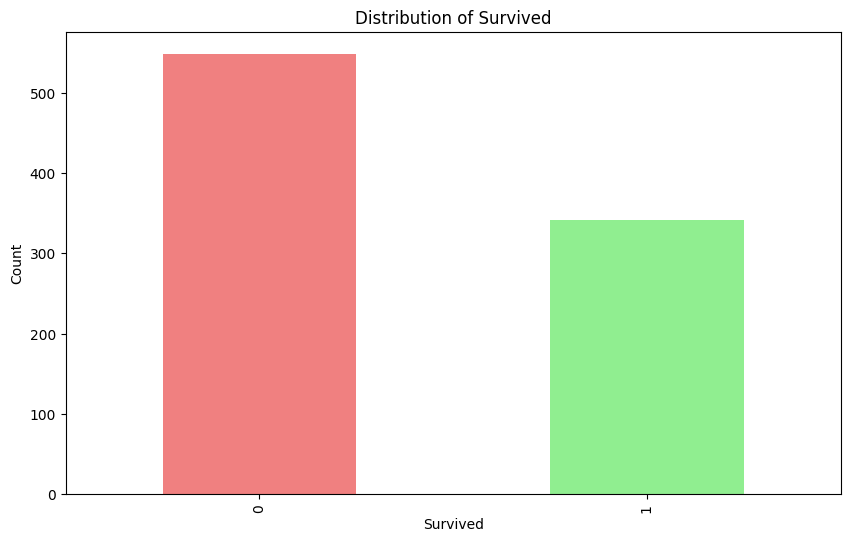

In [ ]:
# Simple distributions and relationships (match common Titanic columns)
# Target distribution if 'survived' present (seaborn titanic uses 'survived'; some CSVs use 'Survived')
target_col = "Survived"
plt.figure(figsize=(10, 6))
df[target_col].value_counts().sort_index().plot(kind='bar',color=['lightcoral','lightgreen'])
plt.title(f"Distribution of {target_col}")
plt.xlabel(target_col)
plt.ylabel("Count")
plt.show()

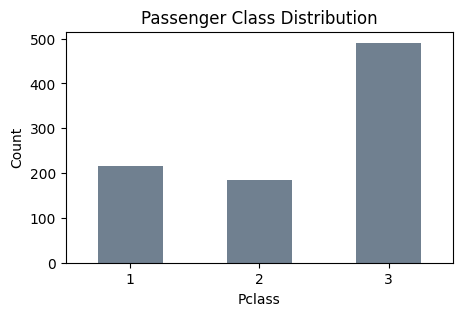

In [ ]:
# Pclass distribution
pclass_col = "pclass" if "pclass" in df.columns else ("Pclass" if "Pclass" in df.columns else None)
if pclass_col:
    plt.figure(figsize=(5,3))
    df[pclass_col].value_counts().sort_index().plot(kind='bar', color='slategrey')
    plt.title("Passenger Class Distribution")
    plt.xlabel(pclass_col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

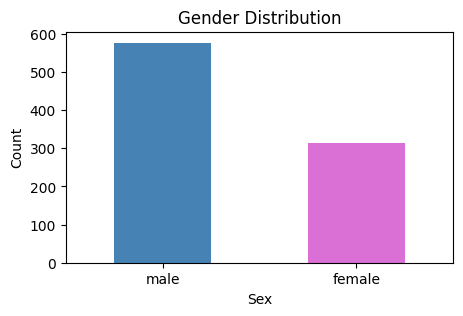

In [ ]:
# Sex distribution
sex_col = "sex" if "sex" in df.columns else ("Sex" if "Sex" in df.columns else None)
if sex_col:
    plt.figure(figsize=(5,3))
    df[sex_col].value_counts().plot(kind='bar', color=['steelblue','orchid'])
    plt.title("Gender Distribution")
    plt.xlabel(sex_col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

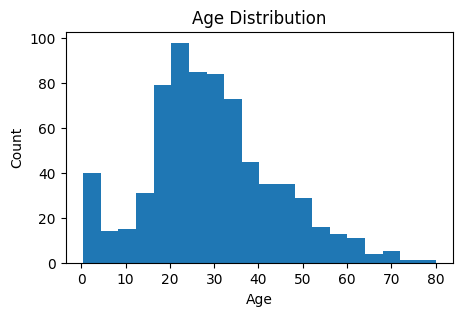

In [ ]:
# Age histogram
age_col = "age" if "age" in df.columns else ("Age" if "Age" in df.columns else None)
if age_col and df[age_col].notna().any():
    plt.figure(figsize=(5,3))
    df[age_col].dropna().plot(kind='hist', bins=20)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

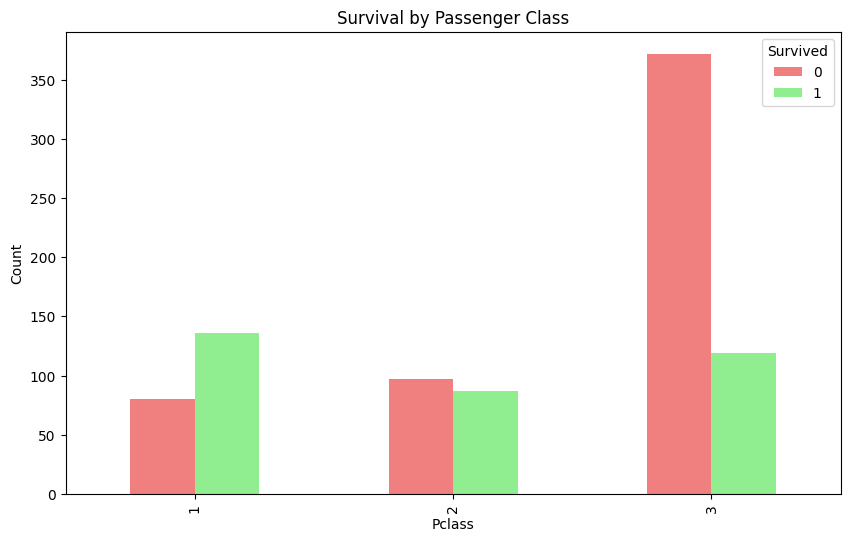

In [ ]:
# Survival by Pclass crosstab
if target_col and pclass_col:
    pd.crosstab(df[pclass_col], df[target_col]).plot(kind='bar',figsize=(10,6),color=['lightcoral','lightgreen'])
    plt.title("Survival by Passenger Class")
    plt.xlabel(pclass_col)
    plt.ylabel("Count")
    plt.show()

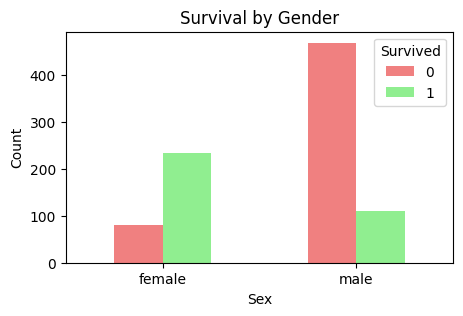

In [ ]:
# Survival by Sex crosstab
if target_col and sex_col:
    pd.crosstab(df[sex_col], df[target_col]).plot(kind='bar', figsize=(5,3), color=['lightcoral','lightgreen'])
    plt.title("Survival by Gender")
    plt.xlabel(sex_col); plt.ylabel("Count"); plt.xticks(rotation=0)
    plt.show()

             PassengerId    Pclass       Age  ...     Parch      Fare  Survived
PassengerId     1.000000 -0.035144  0.036847  ... -0.001652  0.012658 -0.005007
Pclass         -0.035144  1.000000 -0.369226  ...  0.018443 -0.549500 -0.338481
Age             0.036847 -0.369226  1.000000  ... -0.189119  0.096067 -0.077221
SibSp          -0.057527  0.083081 -0.308247  ...  0.414838  0.159651 -0.035322
Parch          -0.001652  0.018443 -0.189119  ...  1.000000  0.216225  0.081629
Fare            0.012658 -0.549500  0.096067  ...  0.216225  1.000000  0.257307
Survived       -0.005007 -0.338481 -0.077221  ...  0.081629  0.257307  1.000000

[7 rows x 7 columns]


<Figure size 1000x600 with 0 Axes>

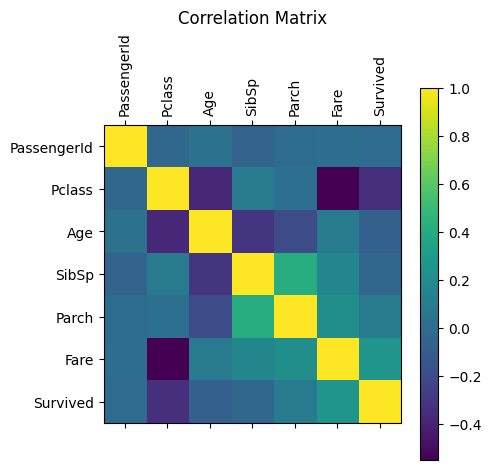

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(10,6))
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns,rotation = 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [ ]:
#Result ->study hour
#Result ->sleep hour

In [ ]:
# Drop unnecessary columns from the original DataFrame
# Based on EDA, 'PassengerId', 'Name', and 'Ticket' are typically not useful features.
# 'Cabin' has a high number of missing values.
colsToDrop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=colsToDrop, errors = 'ignore')
print("Current column list in df: ", df.columns.tolist())

Current column list in df:  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']



## 3) What “model-ready” means
A model-ready table has:
- **Numeric features only** (after encoding categoricals)
- **No missing values** after preprocessing
- Reasonable **scales** for the intended algorithm
- A clearly defined **target `y`**
- No **leakage** (no target-derived info inside features)



## 4) Pick target **y** and features **X** (avoid leakage)
We will:
- Pick `y = Survived`
- Keep the rest columns for `X`
- Drop obvious duplicates/leakage columns if they exist (e.g., `alive` is a text version of survived in seaborn)


In [ ]:
# Choose target (last column) and features (rest)
target = df.columns[-1]
y = df[target].astype(int)

X = df.iloc[:, :-1].copy()

print("X column:", list(X.columns))
print('y name:', target)
X.head(7)

X column: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
y name: Survived


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S



## 5) Split **early**: train vs test (with `stratify`)
We split before computing medians, modes, or scalers. We **fit** decisions on the train set and **apply** them to the test set.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state = 42, stratify = y
)
X_train.shape, X_test.shape

((668, 7), (223, 7))


## 6) Numeric preparation (invalids, missing, outliers)
- Fix invalid values (e.g., negative ages if any)  
- Impute missing numeric values (median is a robust default with outliers)  
- IQR clipping for outliers (example on `age` and `fare`)


In [ ]:
# Automatically identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns: ",num_cols)
print("Categorical columns: ",cat_cols)

Numerical columns:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns:  ['Sex', 'Embarked']


In [ ]:
# Apply numeric preprocessing to train and test sets
train = X_train.copy()
test = X_test.copy()

# Fix invalid values (negative numbers)
for c in num_cols:
  train.loc[train[c] < 0, c] = np.nan
  test.loc[test[c] < 0, c] = np.nan


# Impute missing values with medians (fit on TRAIN, then apply to TEST)
medians = {c: train[c].median() for c in num_cols}
for c in num_cols:
  train[c] = train[c].fillna(medians[c])
  test[c] = test[c].fillna(medians[c])

In [ ]:
# IQR clip for outliers (example on age and fare) (fit on TRAIN, then apply to TEST)
def iqr_bounds(s):
  q1, q3 = s.quantile(0.25), s.quantile(0.75)
  iqr = q3 - q1
  return q1 - 1.5 * iqr, q3 + 1.5 * iqr

for c in [x for x in ["Age", "Fare"] if x in num_cols]:
  lo, hi = iqr_bounds(train[c])
  train[c] = train[c].clip(lower = lo, upper = hi)
  test[c] = test[c].clip(lower = lo, upper = hi)

In [ ]:
# Display descriptive statistics for numeric columns after preprocessing
print("\nDescription statistics for numerical columns (Train set)")
print(train[num_cols].describe())



Description statistics for numerical columns (Train set)
           Pclass         Age       SibSp       Parch        Fare
count  668.000000  668.000000  668.000000  668.000000  668.000000
mean     2.312874   29.506737    0.464072    0.375749   23.441336
std      0.831906   12.309369    0.999353    0.832877   20.042501
min      1.000000    1.000000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    7.895800
50%      3.000000   29.000000    0.000000    0.000000   13.860400
75%      3.000000   36.000000    1.000000    0.000000   30.500000
max      3.000000   57.000000    8.000000    6.000000   64.406300

Description statistics for numerical columns (Test set)
           Pclass         Age       SibSp       Parch        Fare
count  223.000000  223.000000  223.000000  223.000000  223.000000
mean     2.295964   28.744395    0.699552    0.399103   25.216374
std      0.850189   12.518442    1.353790    0.721235   20.478126
min      1.000000    1.0000

In [ ]:
# Display descriptive statistics for numeric columns after preprocessing
print("\nDescription statistics for numerical columns (Test set)")
print(test[num_cols].describe())


Description statistics for numerical columns (Test set)
           Pclass         Age       SibSp       Parch        Fare
count  223.000000  223.000000  223.000000  223.000000  223.000000
mean     2.295964   28.744395    0.699552    0.399103   25.216374
std      0.850189   12.518442    1.353790    0.721235   20.478126
min      1.000000    1.000000    0.000000    0.000000    0.000000
25%      1.000000   23.000000    0.000000    0.000000    8.050000
50%      3.000000   29.000000    0.000000    0.000000   15.850000
75%      3.000000   33.000000    1.000000    1.000000   35.500000
max      3.000000   57.000000    8.000000    4.000000   64.406300


In [ ]:
print("\nTrain set after numeric preprocessing:")
display(train.head(10))

print("\nTest set after numeric preprocessing:")
display(test.head(10))


Train set after numeric preprocessing:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
486,1.0,female,35.0,1.0,0.0,64.4063,S
238,2.0,male,19.0,0.0,0.0,10.5000,S
722,2.0,male,34.0,0.0,0.0,13.0000,S
184,3.0,female,4.0,0.0,2.0,22.0250,S
56,2.0,female,21.0,0.0,0.0,10.5000,S
748,1.0,male,19.0,1.0,0.0,53.1000,S
638,3.0,female,41.0,0.0,5.0,39.6875,S
253,3.0,male,30.0,1.0,0.0,16.1000,S
140,3.0,female,29.0,0.0,2.0,15.2458,C
626,2.0,male,57.0,0.0,0.0,12.3500,Q



Test set after numeric preprocessing:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
157,3.0,male,30.0,0.0,0.0,8.0500,S
501,3.0,female,21.0,0.0,0.0,7.7500,Q
352,3.0,male,15.0,1.0,1.0,7.2292,C
82,3.0,female,29.0,0.0,0.0,7.7875,Q
683,3.0,male,14.0,5.0,2.0,46.9000,S
84,2.0,female,17.0,0.0,0.0,10.5000,S
779,1.0,female,43.0,0.0,1.0,64.4063,S
515,1.0,male,47.0,0.0,0.0,34.0208,S
728,2.0,male,25.0,1.0,0.0,26.0000,S
734,2.0,male,23.0,0.0,0.0,13.0000,S



## 7) Categorical preparation (One-Hot vs Ordinal, rare cats)
- For unordered categories like `sex`, `embarked`: **One-Hot**  
- For ordered categories (not common in Titanic): **Ordinal**  
- Handle rare categories by grouping into "other" (optional demo)


In [ ]:
# Identify categorical columns present (using the list identified earlier)
# Assuming cat_cols was defined in a previous cell and contains 'Sex', 'Embarked'
# If not, we can redefine here:
print(cat_cols)

# Handle missing values in categorical columns
for c in cat_cols:
  train[c] = train[c].fillna("missing")
  test[c] = test[c].fillna("missing")

['Sex', 'Embarked']


**Explanation: Why One-Hot Encoding for sex and embarked**

These are nominal categorical variables. There is no natural order among the categories
(e.g., male is not greater than female, and C is not better than S).

***One-Hot Encoding (recommended here):***


*   Creates new binary columns (0 or 1) for each category.
*   Works well for nominal variables because it does not impose any artificial order.
* Keeps distances meaningful for models that use numeric input.


***Ordinal Encoding (not suitable here):***

* Assigns numerical ranks such as 0, 1, 2.

* Appropriate only when categories have a true order (e.g., low, medium, high).

* Using it for sex or embarked would wrongly suggest an order and can mislead the model.

***Frequency Encoding (use with care):***

* Replaces each category with its frequency or count in the dataset.

* Can capture prevalence but may collapse information if different categories share the same frequency.

* For simple variables like sex and embarked, one-hot is usually clearer and avoids adding a numeric relationship that is not meaningful.

In [ ]:
# Categorical columns for encoding
print(cat_cols)
# Apply One-Hot Encoding
# We will apply this to the 'train' and 'test' dataframes that already had numeric preprocessing and rare category handling.
train_encoded_ohe = pd.get_dummies(train, columns=cat_cols, prefix = cat_cols, dtype = int)
test_encoded_ohe = pd.get_dummies(test, columns=cat_cols, prefix = cat_cols, dtype = int)

# Align columns after One-Hot Encoding
train_cols_ohe = train_encoded_ohe.columns
test_encoded_ohe = test_encoded_ohe.reindex(columns=train_cols_ohe, fill_value=0)

print("\Train set after On-Hot Encoding: ")
display(train_encoded_ohe.head())

print("\nTest set after On-Hot Encoding: ")
display(test_encoded_ohe.head())

['Sex', 'Embarked']
\Train set after On-Hot Encoding: 


<>:12: SyntaxWarning: invalid escape sequence '\T'
<>:12: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-2267996081.py:12: SyntaxWarning: invalid escape sequence '\T'
  print("\Train set after On-Hot Encoding: ")


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
486,1.0,35.0,1.0,0.0,64.4063,1,0,0,0,1,0
238,2.0,19.0,0.0,0.0,10.5000,0,1,0,0,1,0
722,2.0,34.0,0.0,0.0,13.0000,0,1,0,0,1,0
184,3.0,4.0,0.0,2.0,22.0250,1,0,0,0,1,0
56,2.0,21.0,0.0,0.0,10.5000,1,0,0,0,1,0



Test set after On-Hot Encoding: 


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
157,3.0,30.0,0.0,0.0,8.0500,0,1,0,0,1,0
501,3.0,21.0,0.0,0.0,7.7500,1,0,0,1,0,0
352,3.0,15.0,1.0,1.0,7.2292,0,1,1,0,0,0
82,3.0,29.0,0.0,0.0,7.7875,1,0,0,1,0,0
683,3.0,14.0,5.0,2.0,46.9000,0,1,0,0,1,0


In [ ]:
# --- Demonstration of Ordinal and Frequency Encoding (on copies) ---


# Ordinal Encoding Demonstration
# Create copies to avoid modifying the main dataframes


# Fit encoder on train, transform both train and test


# Need to handle potential unseen categories in test if not using handle_unknown
# For simplicity in demo, fit on combined to get all categories, but in real scenario fit only on train


In [ ]:
# Frequency Encoding Demonstration
# Create copies



# Note: The main dataframes 'train_encoded_ohe' and 'test_encoded_ohe' are the ones with One-Hot Encoding applied.


## 8) Datetime to features (tiny synthetic example)
Titanic often lacks a datetime. To teach the idea, we create a synthetic `boarding_date` and derive numeric features.



## 9) Scaling (Standard vs Min-Max vs Robust)
We show Standardization manually. You can swap to Min-Max or Robust later.


###Scaling (Standard vs Min-Max vs Robust)

Scaling is a step to adjust the range of values in your features so that they are on a similar scale. This is important for many machine learning algorithms that are sensitive to the magnitude of features (like those using distance calculations).

Think of it like comparing heights in meters and centimeters – scaling would convert them to the same unit so they can be compared fairly.

**Standardization:** This is the method we're using here. It transforms the data so that it has a mean of 0 and a standard deviation of 1.

*   **How it works:** For each feature, it subtracts the mean of that feature (calculated from the training data) and then divides by the standard deviation of that feature (also calculated from the training data).
*   **Is this approach correct?** Yes, the approach in the code is correct. We calculate the mean and standard deviation *only* from the training data (`fit` on train). This is crucial to prevent "data leakage" from the test set. If we used the test set's statistics, we would be giving the model information about the test set during training, which would make our performance estimates unrealistic. We then apply this learned transformation (using the training mean and standard deviation) to *both* the training and test data (`transform` both).

We show Standardization manually below. You can swap to Min-Max or Robust later, but the principle of fitting on training and transforming both remains the same.

In [ ]:
# Pick numeric columns for scaling (only those that exist after OHE)


# Standardization: z = (x - mean) / std  (fit on TRAIN only)



## 10) Save processed data + tiny sanity check


In [ ]:
# Keep feature matrix aligned with target lengths




---

### Next Session Preview: Pipelines
We will convert today's manual steps into a clean **`Pipeline` + `ColumnTransformer`** so the same logic is applied consistently to train/test and future data.  

### Golden rule

**Split first** → `X_train, X_test, y_train, y_test`
Then **fit on train** → **apply to both** (train & test) using the **same fitted parameters**.

---

### 1) “Learned” transforms (fit on **train only**, transform **both**)

These compute parameters from data. **Never** peek at test to compute them.

*   **Missing-value imputation** (mean/median/mode): compute on train, use same values on test.
*   **Scaling/standardization** (StandardScaler, MinMaxScaler, RobustScaler): fit on train, transform both.
*   **One-Hot/Ordinal encoding** (sklearn encoders): fit on train (learn categories), transform both (`handle_unknown='ignore'` helps).
*   **Outlier caps/clip with IQR or percentiles**: compute bounds on train, apply same bounds to both.
*   **Discretization/binning by quantiles** (KBinsDiscretizer, pd.qcut): fit on train, apply edges to both.
*   **Feature selection** (VarianceThreshold, SelectKBest, model-based, PCA): fit on train, transform both.
*   **Text vectorizers** (CountVectorizer, TF-IDF): fit on train (vocab/idf), transform both.
*   **Target balancing** (SMOTE/oversampling/undersampling): **apply only to the training set** (never to test).
*   **Model hyperparameter tuning / CV**: use **train only** (with internal CV). Pick the best, then evaluate once on test.
*   Manual binning with predefined edges (e.g., ages 0–12, 13–19, …) — edges defined upfront.


---

### 2) “Rule-based / deterministic” transforms (do the **same** on train & test)

These don’t need to “learn” from data, so you can apply identically to both sets.

*   **String cleanup**: lowercasing, trimming spaces, fixing typos with a fixed map.
*   **Type fixes**: `to_datetime`, numeric casting with a fixed rule.
*   **Feature extraction from datetime/text**: year, month, dayofweek, char length, regex parse (fixed pattern).
*   **Unit conversions / math transforms**: log/exp/square (if you choose to always apply), clipping to known business limits.
*   **Manual binning with predefined edge**
*   Dropping constant/ID columns: e.g., PassengerId, Name, Ticket (fixed decision).

If a “deterministic” step derives thresholds from data (e.g., “drop columns with >40% missing”), compute that decision on train, then apply the resulting column list to test.

---

### 3) Things you should never compute using test (to avoid leakage)

* Any statistic used for preprocessing (means, medians, std, percentiles, encoder category sets, PCA components).

* Any feature engineering that looks at target when deciding transforms (e.g., selecting bins using y).

* **Resampling** (SMOTE/undersampling) on test.

* **Feature selection** using y fitted on the full data; fit it on train only.

---

### 4) Quick checklist (practical order)

* **Split** → train/test (with stratify=y for classification).

* **Deterministic fixes on both:** strip/lower text, parse dates, drop IDs, add date features.

* **Fit on train, apply to both:** Imputers → encoders → scalers → (optional) feature selection/PCA.

* (Train only) **Resampling** if needed (SMOTE, class weights).

* **Save fitted preprocessors/pipeline**; transform test with those; evaluate once on test.

---

### Mini examples

* **Imputer example**
Fit median on train ages; fill test ages with the same median.

* **One-Hot example**
Fit encoder on train embarked categories (e.g., {C, Q, S}); transform test with handle_unknown='ignore'.

* **IQR clip**
Compute age lower/upper bounds from train; clip both train and test with those bounds.

This mental model—fit on train, reuse on test—keeps your evaluation honest and leak-free.